In [1]:
import imdb
import httplib
import json


In [2]:
### Get the list of genre id and genre names from TMDB

conn = httplib.HTTPSConnection("api.themoviedb.org")

payload = "{}"

conn.request("GET", "/3/genre/movie/list?language=en-US&api_key=f36152ef9bcf77f762135508f9f4e705", payload)

res = conn.getresponse()
data = res.read()
data=json.loads(data)
genres_list = data["genres"]

genres_list

[{u'id': 28, u'name': u'Action'},
 {u'id': 12, u'name': u'Adventure'},
 {u'id': 16, u'name': u'Animation'},
 {u'id': 35, u'name': u'Comedy'},
 {u'id': 80, u'name': u'Crime'},
 {u'id': 99, u'name': u'Documentary'},
 {u'id': 18, u'name': u'Drama'},
 {u'id': 10751, u'name': u'Family'},
 {u'id': 14, u'name': u'Fantasy'},
 {u'id': 36, u'name': u'History'},
 {u'id': 27, u'name': u'Horror'},
 {u'id': 10402, u'name': u'Music'},
 {u'id': 9648, u'name': u'Mystery'},
 {u'id': 10749, u'name': u'Romance'},
 {u'id': 878, u'name': u'Science Fiction'},
 {u'id': 10770, u'name': u'TV Movie'},
 {u'id': 53, u'name': u'Thriller'},
 {u'id': 10752, u'name': u'War'},
 {u'id': 37, u'name': u'Western'}]

In [3]:
### Search the favorite movie in TMDB and get the genres & poster path

conn = httplib.HTTPSConnection("api.themoviedb.org")

payload = "{}"

conn.request("GET", "/3/search/movie?query=forrest%20gump&api_key=f36152ef9bcf77f762135508f9f4e705", payload)

res = conn.getresponse()
data = res.read()
data=json.loads(data)

genre_id = data["results"][0]["genre_ids"]
poster_path = data["results"][0]["poster_path"]

In [4]:
### From genre id to genre names
movie_genre=[]
for i in genre_id:
    for genre in genres_list:
        if genre["id"]==i:
            movie_genre.append(genre["name"])
movie_genre

[u'Comedy', u'Drama', u'Romance']

In [5]:
### download poster
url = "https://image.tmdb.org/t/p/w500"
url = url + poster_path
url

u'https://image.tmdb.org/t/p/w500/yE5d3BUhE8hCnkMUJOo1QDoOGNz.jpg'

In [6]:
import wget
wget.download(url,"./")


u'.//yE5d3BUhE8hCnkMUJOo1QDoOGNz (1).jpg'

In [7]:
### Search the favorite movie in IMDB and get the genres information

i = imdb.IMDb()
movie_list = i.search_movie("Forrest Gump")
first_match = movie_list[0]
i.update(first_match)
first_match["genres"]

[u'Comedy', u'Drama', u'Romance']

In [8]:
### A list of the 10 most popular movies of 2016 from TMDB and their genres

conn = httplib.HTTPSConnection("api.themoviedb.org")
payload = "{}"
conn.request("GET", "/3/discover/movie?year=2016&page=1&include_video=false&include_adult=false&sort_by=popularity.desc&language=en-US&api_key=f36152ef9bcf77f762135508f9f4e705", payload)
res = conn.getresponse()
data = res.read()
data=json.loads(data)
movies = data["results"][0:10]

movie_dict = {}

for movie in movies:
    movie_genre=[]
    for i in movie["genre_ids"]:
        for genre in genres_list:
            if genre["id"]==i:
                movie_genre.append(genre["name"])
    movie_dict[movie["original_title"]]=movie_genre

movie_dict

{u'Arrival': [u'Drama', u'Science Fiction'],
 u'Captain America: Civil War': [u'Action', u'Science Fiction'],
 u'Deadpool': [u'Action', u'Adventure', u'Comedy', u'Romance'],
 u'Doctor Strange': [u'Action', u'Adventure', u'Fantasy', u'Science Fiction'],
 u'Fantastic Beasts and Where to Find Them': [u'Adventure',
  u'Action',
  u'Fantasy'],
 u'Finding Dory': [u'Adventure', u'Animation', u'Comedy', u'Family'],
 u'Rogue One: A Star Wars Story': [u'Action',
  u'Drama',
  u'Science Fiction',
  u'War'],
 u'Sing': [u'Animation', u'Comedy', u'Drama', u'Family', u'Music'],
 u'Split': [u'Horror', u'Thriller'],
 u'Underworld: Blood Wars': [u'Action', u'Horror']}

In [9]:
### Generating a heatmap to show the frequency of genres appearing together

import numpy as np
import pandas as pd

g_names = []
for i in genres_list:
    g_names.append(i["name"])
    
g_matrix = np.zeros(shape=(19,19))
g_matrix = pd.DataFrame(g_matrix, index=g_names, columns=g_names)

In [10]:
### Using most popular movie data

conn = httplib.HTTPSConnection("api.themoviedb.org")
payload = "{}"
conn.request("GET", "/3/discover/movie?include_video=false&include_adult=false&sort_by=popularity.desc&language=en-US&api_key=f36152ef9bcf77f762135508f9f4e705", payload)
res = conn.getresponse()
data = res.read()
data=json.loads(data)

movies = data["results"]
movie_dict = {}
for movie in movies:
    movie_genre=[]
    for i in movie["genre_ids"]:
        for genre in genres_list:
            if genre["id"]==i:
                movie_genre.append(genre["name"])
    movie_dict[movie["original_title"]]=movie_genre

for movie in movie_dict:
    for i in movie_dict[movie]:
        for j in movie_dict[movie]:
            g_matrix[i][j]+=1

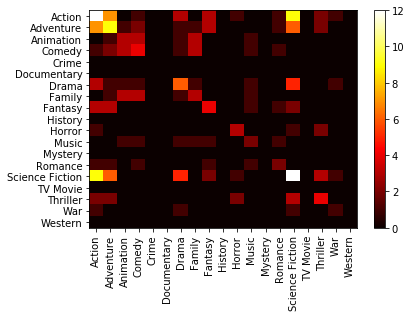

In [11]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
heatmap=ax.pcolor(g_matrix, cmap="hot")

cbar = plt.colorbar(heatmap)


ax.set_xticks(np.arange(19) + 0.5, minor=False)
ax.set_yticks(np.arange(19) + 0.5, minor=False)
ax.invert_yaxis()

column_labels = g_names
row_labels = g_names
ax.set_xticklabels(column_labels,rotation="vertical", minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()